In [1]:
# Imports
import numpy as np

from skimage.measure import label, regionprops

from scipy.spatial import distance
#from scipy.ndimage import label

from tqdm import tqdm

import sys
sys.path.append('../src/')


import matplotlib.pyplot as plt
import matplotlib.animation as animation


Bad key savefig.frameon in file /cluster/home/oschmanf/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /cluster/home/oschmanf/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /cluster/home/oschmanf/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You pro

In [2]:
# Load data
data_res = np.load('../data/results_all_red.npz')
results_all_red = data_res['results_all_red']

data_inp = np.load('../data/inputs_all_red.npz')
inputs_all = data_inp['inputs_all']

data_inp = np.load('../data/label_stack.npz')
label_stack = data_inp['label_stack']

# Animations

## Single cell

In [3]:
cell_id = 55

<IPython.core.display.Javascript object>


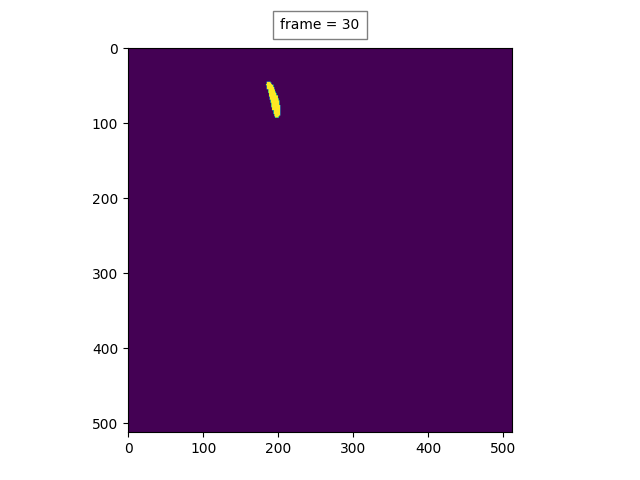

/cluster/home/oschmanf/.local/lib/python3.7/site-packages/matplotlib/animation.py:974: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  'Animation was deleted without rendering anything. This is '


In [10]:
%matplotlib notebook

fig = plt.figure()

def f(frame):
    return (label_stack[frame] == cell_id)

start_frame = np.where(label_stack == cell_id)[0][0]
frame = start_frame

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], facecolor='#cfd98c')
im = ax.imshow(f(frame), animated=True)
title = ax.text(0.5,1.05, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax.transAxes, ha="center")


def updatefig(*args):
    global frame
    if frame < 50:
        frame += int(1)
    elif frame >= 50:
        frame = start_frame
    im.set_array(f(frame))
    #im.suptitle(str(frame))
    title.set_text('frame = ' + str(frame))
    return im, title

def animate(frame_num):
    return label_stack[frame_num]

ani = animation.FuncAnimation(fig, updatefig, interval=50, repeat=True)
plt.show()

## All cells

<IPython.core.display.Javascript object>


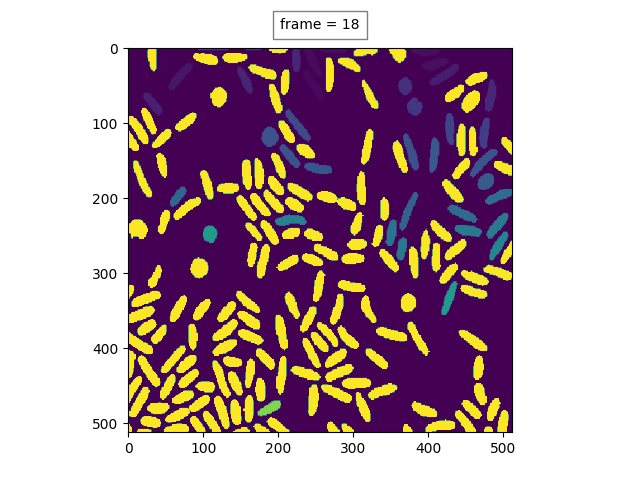

In [11]:
%matplotlib notebook
fig = plt.figure()

def f(frame):
    return (label_stack[frame])

frame = 0

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], facecolor='#cfd98c')
im = ax.imshow(f(frame), animated=True)
title = ax.text(0.5,1.05, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax.transAxes, ha="center")


def updatefig(*args):
    global frame
    if frame < 50:
        frame += int(1)
    elif frame >= 50:
        frame = 0
    im.set_array(f(frame))
    #im.suptitle(str(frame))
    title.set_text('frame = ' + str(frame))
    return im, title

def animate(frame_num):
    return label_stack[frame_num]

ani = animation.FuncAnimation(fig, updatefig, interval=50, repeat=True)
plt.show()

## Features

In [6]:
def compute_area(cell_id):
    areas = []
    for i in range(num_time_steps-1):
        regs_cell = regionprops((label_stack[i] == cell_id).astype(int))
        try:
            areas.append(regs_cell[0].area)
        except IndexError:
            areas.append(0)
    areas = np.array(areas)
    return areas

def compute_length(cell_id):
    lengths = []
    for i in range(num_time_steps-1):
        regs_cell = regionprops((label_stack[i] == cell_id).astype(int))
        try:
            lengths.append(regs_cell[0].major_axis_length)
        except IndexError:
            lengths.append(0)
    lengths = np.array(lengths)
    return lengths

In [7]:
cell_id=300
num_time_steps = len(label_stack)

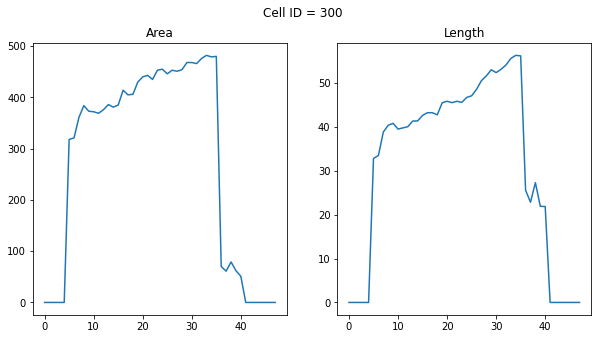

In [8]:
%matplotlib inline

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(compute_area(cell_id=cell_id))
plt.title('Area')

plt.subplot(1,2,2)
plt.plot(compute_length(cell_id=cell_id))
plt.title('Length')

plt.suptitle('Cell ID = ' + str(cell_id))

plt.show()

# Segmentation failure

Text(0.5, 1.0, 'Lineage')

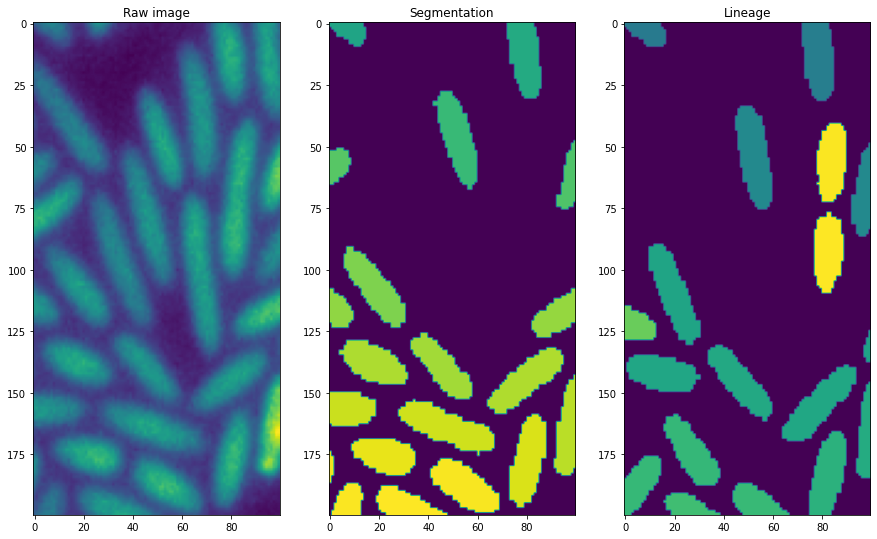

In [9]:
plt.figure(figsize = (15,15))

plt.subplot(1,3,1)
plt.imshow(inputs_all[1][300:500,150:250,0])
plt.title('Raw image')

plt.subplot(1,3,2)
plt.imshow(inputs_all[1][300:500,150:250,1])
plt.title('Segmentation')

plt.subplot(1,3,3)
plt.imshow(label_stack[4][300:500,150:250])
plt.title('Lineage')